# Installs & Imports

In [1]:
!pip -q install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 9.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from semopy import Model, Optimizer
from semopy.inspector import inspect
from semopy.examples import political_democracy
import matplotlib.pyplot as plt
from semopy.plot import semplot
from semopy.report import report as sem_report
from semopy.stats import calc_stats
from IPython.display import display, HTML, Image

# Load the Data

In [3]:
# Load the data
data = political_democracy.get_data()
print("Dataset Head:")
display(data.head())

Dataset Head:


,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679


# Define the Model

In [4]:
# Define the SEM model
model_desc = """
  # Measurement part (relationships between latent variables and observed variables)
  ind60 =~ x1 + x2 + x3
  dem60 =~ y1 + y2 + y3 + y4
  dem65 =~ y5 + y6 + y7 + y8

  # Structural part (regressions between latent variables)
  dem65 ~ dem60
  dem60 ~ ind60
"""

In [5]:
# Initialize the model
model = Model(model_desc)
model.load_dataset(data)

# Fit the SEM model
model.fit()

SolverResult(fun=1.0195603114955745, success=True, n_it=41, x=array([2.17909487, 1.8175802 , 1.35409726, 1.04864497, 1.32045571,
       1.28911928, 1.30782782, 1.33483564, 0.9308728 , 1.63105134,
       3.53713204, 0.11610533, 0.44882976, 0.08122298, 0.12062274,
       0.46711942, 2.05319463, 6.69714409, 5.42521174, 2.81817551,
       2.51943904, 4.21714484, 3.44224427, 2.87836273]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

# Evaluate the Model

In [6]:
# Summary of the model fit
print("SEM Model Summary:")
model_report = inspect(model)
display(model_report)

SEM Model Summary:


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dem65,~,dem60,0.930873,0.118042,7.885913,0.0
1,dem60,~,ind60,1.631051,0.37543,4.344483,0.000014
2,x1,~,ind60,1.000000,-,-,-
3,x2,~,ind60,2.179095,0.1389,15.68824,0.0
4,x3,~,ind60,1.817580,0.151853,11.969358,0.0
5,y1,~,dem60,1.000000,-,-,-
6,y2,~,dem60,1.354097,0.179477,7.544663,0.0
7,y3,~,dem60,1.048645,0.153486,6.832183,0.0
8,y4,~,dem60,1.320456,0.141535,9.329545,0.0
9,y5,~,dem65,1.000000,-,-,-


In [7]:
# Compute goodness-of-fit indices
fit_stats = calc_stats(model)
print("Goodness-of-Fit Indices:")
display(fit_stats.T)

Goodness-of-Fit Indices:


,Value
DoF,42.000000
DoF Baseline,55.000000
chi2,76.467023
chi2 p-value,0.000909
chi2 Baseline,730.654577
CFI,0.948987
GFI,0.895344
AGFI,0.862951
NFI,0.895344
TLI,0.933198


In [8]:
# Generate a detailed HTML report
sem_report(model, name="Political_Democracy_Model", std_est=True, se_robust=False)

# Open and display the HTML report in the notebook
with open("Political_Democracy_Model/report.html", "r") as file:
    report_html = file.read()

# Display the HTML content
display(HTML(report_html))

# Visualization

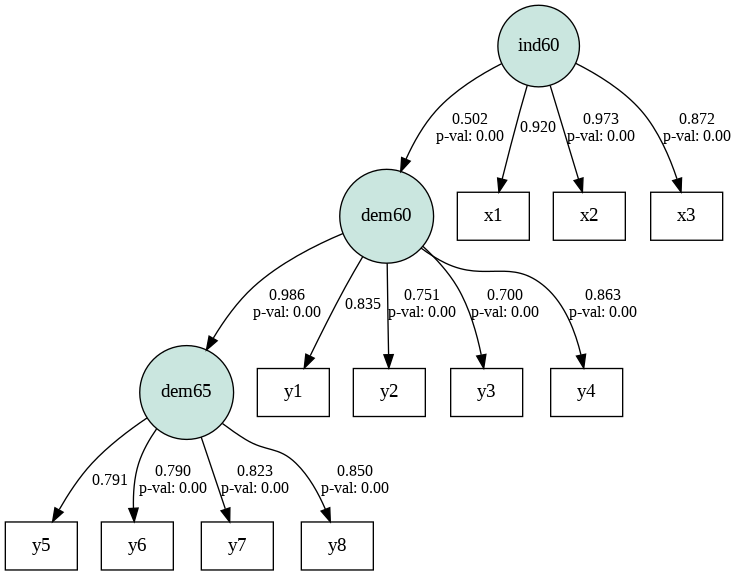

In [9]:
# Visualize the SEM model (path diagram) and save as PNG
semplot(model, filename='sem_model_diagram.png', std_ests=True, show=False)

# Show the image in Colab notebook
display(Image(filename='sem_model_diagram.png'))

In [10]:
# Predict latent variable scores
latent_scores = model.predict_factors(data)
print("Predicted Latent Variable Scores:")
display(latent_scores.head())

Predicted Latent Variable Scores:


,dem60,dem65,ind60
0,-2.517392,-2.272266,-0.541745
1,-2.081216,-1.727488,0.130080
2,3.107255,2.974294,0.737400
3,3.015043,2.752404,1.251266
4,2.155298,1.995157,0.834662


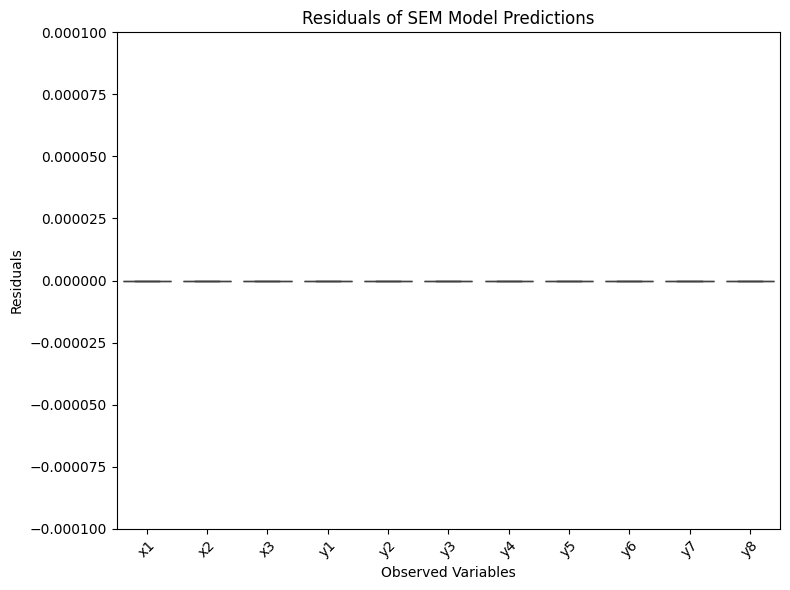

In [11]:
# Calculate the difference between actual and predicted values
predictions = model.predict(data)  # Predict observed values
residuals = data - predictions  # Calculate residuals

# Plot the residuals for each observed variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=residuals)
plt.title("Residuals of SEM Model Predictions")
plt.xlabel("Observed Variables")
plt.ylabel("Residuals")
plt.ylim([-0.0001, 0.0001])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Bootstrapping

In [12]:
# Function to run the bootstrapping
def run_bootstrap(data, model_desc, n_bootstraps=1000):
    """
    Runs a bootstrap analysis, fitting the SEM model to bootstrap samples and extracting parameters.

    Parameters:
    - data: Pandas DataFrame with the data
    - model_desc: SEM model description
    - n_bootstraps: Number of bootstrap iterations

    Returns:
    - param_samples_df: DataFrame of bootstrap parameter estimates
    - missing_param_log: Dictionary of samples with missing parameters
    - success_count: Number of successfully fitted bootstrap samples
    """
    n_samples = data.shape[0]
    param_samples = []
    stderr_samples = []  # To store standard errors
    missing_param_log = {}
    success_count = 0  # To track successful fits
    expected_num_params = None  # To store the expected number of parameters

    for i in range(n_bootstraps):
        # Resample the dataset with replacement
        boot_sample = data.sample(n=n_samples, replace=True, random_state=random.randint(0, 100000))

        # Initialize the model and load the bootstrapped dataset
        boot_model = Model(model_desc)
        boot_model.load_dataset(boot_sample)

        try:
            # Fit the model to the bootstrapped dataset
            boot_model.fit()

            # Get parameter estimates
            param_df = boot_model.inspect(mode='list')

            # Dynamically determine the expected number of parameters from the first fit
            if expected_num_params is None:
                if 'Estimate' in param_df.columns:
                    expected_num_params = len(param_df['Estimate'].values)
                    print(f"Determined expected number of parameters: {expected_num_params}")
                else:
                    raise ValueError(f"'Estimate' column not found in inspect output.")

            # Extract the 'Estimate' and 'Std. Err.' columns, if present
            param_vals = param_df['Estimate'].values
            if 'Std. Err' in param_df.columns:
                stderr_vals = param_df['Std. Err'].values
            else:
                stderr_vals = [np.nan] * len(param_vals)  # Use NaN if standard errors are not present

            # Check if the correct number of parameters was estimated
            if len(param_vals) == expected_num_params:
                param_samples.append(param_vals)
                stderr_samples.append(stderr_vals)
                success_count += 1
            else:
                missing_indices = set(range(expected_num_params)) - set(range(len(param_vals)))
                missing_param_log[i] = missing_indices

        except Exception as e:
            missing_param_log[i] = str(e)

    # Convert parameter samples and standard errors to a DataFrame (handling cases where some samples may be missing parameters)
    if param_samples:
        param_samples_df = pd.DataFrame(param_samples, columns=[f"Param_{i}" for i in range(expected_num_params)])
        stderr_samples_df = pd.DataFrame(stderr_samples, columns=[f"StdErr_{i}" for i in range(expected_num_params)])
    else:
        param_samples_df = pd.DataFrame()  # If no samples succeeded
        stderr_samples_df = pd.DataFrame()  # If no samples succeeded

    return param_samples_df, stderr_samples_df, missing_param_log, success_count, expected_num_params

In [13]:
# Run bootstrapping
param_samples_df, stderr_samples_df, missing_param_log, success_count, expected_num_params = run_bootstrap(data, model_desc, n_bootstraps=1000)

# Final summary
print(f"Bootstrap completed. Successful fits: {success_count}/{1000}. Samples with missing parameters: {len(missing_param_log)}")

# Save the parameter estimates and standard errors to a CSV if there are successful fits
if not param_samples_df.empty:
    results_df = pd.concat([param_samples_df, stderr_samples_df], axis=1)
    results_df.to_csv('bootstrap_param_estimates_and_stderr.csv', index=False)
    print(f"Parameter estimates and standard errors saved to 'bootstrap_param_estimates_and_stderr.csv'.")

    # Set pandas option to display all columns
    pd.set_option('display.max_columns', None)  # Set to None to display all columns

    # Display the DataFrame of parameter estimates and standard errors
    print("Displaying the parameter estimates and standard errors:")
    display(results_df.head(20))  # Display the first 20 rows of the DataFrame

    pd.reset_option('display.max_columns')  # Reset the display option back to default
else:
    print("No successful bootstrap samples to save.")

# Print a summary of samples with missing parameters or errors
if missing_param_log:
    print(f"Details of samples with missing parameters or errors:")
    for sample, issue in missing_param_log.items():
        print(f"Sample {sample}: {issue}")
else:
    print("No samples had missing parameters or errors.")

Determined expected number of parameters: 27
Bootstrap completed. Successful fits: 1000/1000. Samples with missing parameters: 0
Parameter estimates and standard errors saved to 'bootstrap_param_estimates_and_stderr.csv'.
Displaying the parameter estimates and standard errors:


,Param_0,Param_1,Param_2,Param_3,Param_4,Param_5,Param_6,Param_7,Param_8,Param_9,Param_10,Param_11,Param_12,Param_13,Param_14,Param_15,Param_16,Param_17,Param_18,Param_19,Param_20,Param_21,Param_22,Param_23,Param_24,Param_25,Param_26,StdErr_0,StdErr_1,StdErr_2,StdErr_3,StdErr_4,StdErr_5,StdErr_6,StdErr_7,StdErr_8,StdErr_9,StdErr_10,StdErr_11,StdErr_12,StdErr_13,StdErr_14,StdErr_15,StdErr_16,StdErr_17,StdErr_18,StdErr_19,StdErr_20,StdErr_21,StdErr_22,StdErr_23,StdErr_24,StdErr_25,StdErr_26
0,0.958014,1.436873,1.0,2.354683,1.842526,1.0,1.435799,1.144634,1.418923,1.0,1.238859,1.466319,1.360347,3.597257,1.664693e-01,0.436027,0.071514,0.149924,0.444421,2.672877,3.816826,5.716969,1.748268,3.031998,2.908975,3.952000,1.740611,0.133567,0.378542,-,0.146142,0.149314,-,0.172222,0.170674,0.151380,-,0.158519,0.186550,0.156848,0.894753,0.173716,0.083180,0.017954,0.079097,0.086440,0.483512,0.726724,0.992039,0.420236,0.538992,0.547343,0.747290,0.393781
1,0.925066,1.299756,1.0,2.061422,1.845759,1.0,1.280936,1.207939,1.226218,1.0,1.272439,1.415980,1.218235,5.070887,1.218431e-01,0.542950,0.052833,0.133322,0.423199,1.293762,5.599833,4.937337,3.217832,1.877137,2.855448,3.185430,2.005192,0.087061,0.377331,-,0.103534,0.125127,-,0.135351,0.127250,0.111079,-,0.126208,0.137111,0.113962,1.013400,0.173894,0.097711,0.015190,0.057336,0.081424,0.280435,1.001728,0.883970,0.612602,0.353985,0.544119,0.618898,0.403826
2,1.002757,1.460970,1.0,2.163611,1.822671,1.0,1.448424,1.105710,1.378160,1.0,1.288826,1.495526,1.302956,3.313863,2.534130e-01,0.376113,0.058403,0.205770,0.387375,1.864657,4.960233,7.574771,3.063826,2.752540,3.072681,2.803284,2.350994,0.132017,0.390987,-,0.148020,0.151479,-,0.178046,0.186325,0.154301,-,0.158723,0.172321,0.152447,0.778281,0.216633,0.071602,0.016554,0.071568,0.078031,0.368432,0.936087,1.301685,0.627842,0.502010,0.595322,0.598275,0.487113
3,0.886259,1.585242,1.0,2.001469,1.833167,1.0,1.224377,0.933820,1.158053,1.0,1.313412,1.333357,1.239176,4.792919,0.000000e+00,0.495722,0.071152,0.136228,0.370950,1.253505,5.175690,4.620878,2.547171,1.837219,4.689732,2.718952,2.705939,0.083104,0.391340,-,0.117094,0.132339,-,0.128749,0.115589,0.100162,-,0.152933,0.133805,0.128489,0.957453,0.160605,0.092807,0.017718,0.057765,0.075680,0.274638,0.924071,0.798404,0.495523,0.345531,0.838401,0.529320,0.512535
4,0.848208,1.157451,1.0,1.971040,1.788655,1.0,1.508014,1.477289,1.473917,1.0,1.579967,1.762428,1.697999,2.869468,1.574270e-17,0.505351,0.069165,0.106221,0.519277,2.607557,7.204975,5.494991,2.883980,3.545673,4.714387,2.883128,2.095449,0.149913,0.317291,-,0.113325,0.143451,-,0.230833,0.213212,0.187005,-,0.276140,0.279974,0.263844,0.761578,0.123171,0.094308,0.018638,0.059965,0.097579,0.471439,1.276907,0.997594,0.593119,0.608466,0.848203,0.585318,0.460042
5,0.915663,1.606518,1.0,2.254455,1.908332,1.0,1.463780,0.775513,1.313542,1.0,1.471993,1.404356,1.394909,3.761479,2.160723e-01,0.456707,0.088318,0.179188,0.390917,1.906861,5.101430,5.805984,2.881717,1.555453,3.954619,2.444444,2.504634,0.100580,0.379708,-,0.149431,0.149575,-,0.164478,0.141898,0.135314,-,0.155539,0.135404,0.135583,0.850508,0.187040,0.088996,0.020368,0.078067,0.082758,0.378852,0.969092,0.980649,0.592491,0.303241,0.748986,0.502235,0.509564
6,1.072998,2.090014,1.0,2.122694,1.730931,1.0,1.240941,1.192667,1.393894,1.0,1.123351,1.192076,1.182982,2.939248,4.167046e-17,0.582756,0.048557,0.195714,0.452137,2.237192,5.009377,5.473671,2.252460,3.045338,3.730485,2.831669,1.495656,0.121137,0.321510,-,0.107315,0.120852,-,0.146838,0.148515,0.130202,-,0.129549,0.126089,0.113356,0.678678,0.188947,0.103665,0.015621,0.068471,0.085381,0.409860,0.882286,0.951966,0.476543,0.545174,0.669844,0.535703,0.334527
7,0.879753,1.254361,1.0,2.184552,1.788594,1.0,1.281355,0.971886,1.213836,1.0,1.287727,1.409919,1.438628,4.259082,5.180653e-02,0.475518,0.108450,0.094030,0.521226,1.685945,7.880276,4.705800,2.646088,1.821277,4.837651,3.674003,1.419091,0.097630,0.378363,-,0.150371,0.159198,-,0.174140,0.133903,0.121664,-,0.168647,0.

No samples had missing parameters or errors.


# RPy2 Workflow

In [14]:
!pip install -q rpy2

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
import contextlib
import io
import os
from IPython.display import Image, display, HTML
from rpy2.robjects.packages import importr, PackageNotInstalledError
from rpy2.robjects.vectors import StrVector
from rpy2.robjects import r, pandas2ri, DataFrame
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import FloatVector, StrVector
import rpy2.robjects.lib.grdevices as grdevices
import rpy2.ipython.html

In [16]:
# Enable R printing
rpy2.ipython.html.init_printing()

# Enable automatic DataFrame conversion
pandas2ri.activate()

In [17]:
# Function to install R packages if not already installed
def install_if_needed(package_name):
    try:
        importr(package_name)
        print(f"{package_name} is already installed.")
    except PackageNotInstalledError:
        print(f"Installing {package_name}...")
        utils = importr('utils')
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            with contextlib.redirect_stdout(None):
                utils.install_packages(StrVector([package_name]), quiet=True)

# List of required R packages
required_packages = ['lavaan', 'semPlot', 'psych']

# Install required R packages
for package in required_packages:
    install_if_needed(package)

print("\nR packages installed successfully.")

Installing lavaan...


Installing semPlot...


psych is already installed.

R packages installed successfully.


In [18]:
# Import R packages
utils = importr('utils')
base = importr('base')
lavaan = importr('lavaan')
semPlot = importr('semPlot')
psych = importr('psych')

print("R packages imported successfully.")

R packages imported successfully.


In [19]:
# Load the dataset into R environment
r('data("HolzingerSwineford1939")')
data_r = r('HolzingerSwineford1939')

In [20]:
# Convert R DataFrame to Pandas DataFrame
with localconverter(ro.default_converter + pandas2ri.converter):
    data_pd = ro.conversion.rpy2py(data_r)

In [21]:
# View the dataset in Python
print("Dataset:")
display(data_pd.head())

Dataset:


,id,sex,ageyr,agemo,school,grade,x1,x2,x3,x4,x5,x6,x7,x8,x9
1,1,1,13,1,Pasteur,7,3.333333,7.75,0.375,2.333333,5.75,1.285714,3.391304,5.75,6.361111
2,2,2,13,7,Pasteur,7,5.333333,5.25,2.125,1.666667,3.00,1.285714,3.782609,6.25,7.916667
3,3,2,13,1,Pasteur,7,4.500000,5.25,1.875,1.000000,1.75,0.428571,3.260870,3.90,4.416667
4,4,1,13,2,Pasteur,7,5.333333,7.75,3.000,2.666667,4.50,2.428571,3.000000,5.30,4.861111
5,5,2,12,2,Pasteur,7,4.833333,4.75,0.875,2.666667,4.00,2.571429,3.695652,6.30,5.916667


In [22]:
# Summary statistics using the psych package in R
r('print(psych::describe(HolzingerSwineford1939))')

        vars   n   mean     sd median trimmed    mad   min    max  range  skew
id         1 301 176.55 105.94 163.00  176.78 140.85  1.00 351.00 350.00 -0.01
sex        2 301   1.51   0.50   2.00    1.52   0.00  1.00   2.00   1.00 -0.06
ageyr      3 301  13.00   1.05  13.00   12.89   1.48 11.00  16.00   5.00  0.69
agemo      4 301   5.38   3.45   5.00    5.32   4.45  0.00  11.00  11.00  0.09
school*    5 301   1.52   0.50   2.00    1.52   0.00  1.00   2.00   1.00 -0.07
grade      6 300   7.48   0.50   7.00    7.47   0.00  7.00   8.00   1.00  0.09
x1         7 301   4.94   1.17   5.00    4.96   1.24  0.67   8.50   7.83 -0.25
x2         8 301   6.09   1.18   6.00    6.02   1.11  2.25   9.25   7.00  0.47
x3         9 301   2.25   1.13   2.12    2.20   1.30  0.25   4.50   4.25  0.38
x4        10 301   3.06   1.16   3.00    3.02   0.99  0.00   6.33   6.33  0.27
x5        11 301   4.34   1.29   4.50    4.40   1.48  1.00   7.00   6.00 -0.35
x6        12 301   2.19   1.10   2.00    2.09   1.06

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
id,1.0,301.0,176.55,105.94,163.00,176.78,140.85,1.00,351.00,350.00,-0.01,-1.36,6.11
sex,2.0,301.0,1.51,0.50,2.00,1.52,0.00,1.00,2.00,1.00,-0.06,-2.00,0.03
ageyr,3.0,301.0,13.00,1.05,13.00,12.89,1.48,11.00,16.00,5.00,0.69,0.20,0.06
agemo,4.0,301.0,5.38,3.45,5.00,5.32,4.45,0.00,11.00,11.00,0.09,-1.22,0.20
school*,5.0,301.0,1.52,0.50,2.00,1.52,0.00,1.00,2.00,1.00,-0.07,-2.00,0.03
grade,6.0,300.0,7.48,0.50,7.00,7.47,0.00,7.00,8.00,1.00,0.09,-2.00,0.03
x1,7.0,301.0,4.94,1.17,5.00,4.96,1.24,0.67,8.50,7.83,-0.25,0.31,0.07
x2,8.0,301.0,6.09,1.18,6.00,6.02,1.11,2.25,9.25,7.00,0.47,0.33,0.07
x3,9.0,301.0,2.25,1.13,2.12,2.20,1.30,0.25,4.50,4.25,0.38,-0.91,0.07
x4,10.0,301.0,3.06,1.16,3.00,3.02,0.99,0.00,6.33,6.33,0.27,0.08,0.07


In [23]:
# Define the SEM model in R as a string
sem_model_r = """
  # Measurement model
  visual =~ x1 + x2 + x3
  textual =~ x4 + x5 + x6
  speed =~ x7 + x8 + x9

  # Correlations between latent variables
  visual ~~ textual
  visual ~~ speed
  textual ~~ speed
"""

In [24]:
# Convert Python DataFrame into an R DataFrame using ro.DataFrame
r_data = ro.DataFrame(data_pd)

# Add the R DataFrame to the global environment
ro.globalenv['r_data'] = r_data

In [25]:
# R script for SEM model fitting, extracting results, and generating the SEM path diagram
r_code = '''
library(lavaan)
library(semPlot)

# Define the SEM model
sem_model <- '
  visual =~ x1 + x2 + x3
  textual =~ x4 + x5 + x6
  speed =~ x7 + x8 + x9

  visual ~~ textual
  visual ~~ speed
  textual ~~ speed
'

# Fit the SEM model using the R data
fit <- sem(sem_model, data=r_data)

# Get summary with fit measures and standardized estimates
fit_summary <- summary(fit, fit.measures=TRUE, standardized=TRUE)

# Extract the parameter estimates
param_estimates <- parameterEstimates(fit)

# Extract fit measures
fit_measures <- fitMeasures(fit)

# Save the SEM path diagram as a PNG
png(file="sem_path_diagram.png")
semPaths(fit, what="std", layout="tree", rotation=2, sizeMan=7, sizeLat=10, edge.label.cex=1.2, nCharNodes=8, style="ram", title=FALSE)
dev.off()

# Return a list with results
list(
    fit_summary = fit_summary,
    param_estimates = param_estimates,
    fit_measures = fit_measures
)
'''

# Execute the R code and retrieve the results
result = ro.r(r_code)

In [26]:
# Extract results from the list returned by the R script
fit_summary = result.rx2('fit_summary')
param_estimates = result.rx2('param_estimates')
fit_measures = result.rx2('fit_measures')

In [27]:
# Print the results in Python
print("SEM Model Summary:")
print(fit_summary)

print("\nFit Measures:")
print(fit_measures)

print("\nParameter Estimates:")
print(param_estimates)

SEM Model Summary:
lavaan 0.6-18 ended normally after 35 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        21

  Number of observations                           301

Model Test User Model:
                                                      
  Test statistic                                85.306
  Degrees of freedom                                24
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               918.852
  Degrees of freedom                                36
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.931
  Tucker-Lewis Index (TLI)                       0.896

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -3737.745
  Loglikelihood unrestricted 

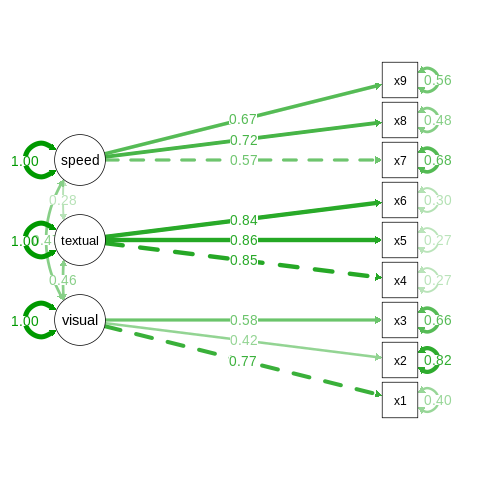

In [28]:
# Display the generated SEM path diagram
display(Image(filename="sem_path_diagram.png"))

In [29]:
# Add the SEM model to the R environment
ro.globalenv['sem_model_r'] = sem_model_r

# Fit the SEM model using lavaan and extract results in Python
fit_r = ro.r('lavaan::sem')(sem_model_r, data=r_data)

In [30]:
# Extract goodness-of-fit indices
fit_measures = ro.r('lavaan::fitMeasures')(fit_r)
print("Goodness-of-Fit Indices:")
display(fit_measures)

Goodness-of-Fit Indices:


array([ 2.10000000e+01,  1.41703525e-01,  8.53055218e+01,  2.40000000e+01,
        8.50255322e-09,  9.18851589e+02,  3.60000000e+01,  0.00000000e+00,
        9.30559652e-01,  8.95839478e-01,  8.95839478e-01,  8.60741077e-01,
        9.07160718e-01,  6.04773812e-01,  9.31490850e-01,  9.30559652e-01,
       -3.73774493e+03, -3.69509217e+03,  7.51748985e+03,  7.59533917e+03,
        3.01000000e+02,  7.52873911e+03,  9.21214845e-02,  7.14184904e-02,
        1.13678017e-01,  9.00000000e-01,  6.61236778e-04,  5.00000000e-02,
        8.39552897e-01,  8.00000000e-02,  8.21843333e-02,  8.21843333e-02,
        6.52050572e-02,  6.52050572e-02,  6.52050572e-02,  7.29014728e-02,
        7.29014728e-02,  6.52050595e-02,  6.52050595e-02,  1.29490200e+02,
        1.52654027e+02,  9.43332061e-01,  8.93747615e-01,  5.03110433e-01,
        9.03177286e-01,  4.22941933e-01])

In [31]:
# Extract parameter estimates
param_estimates = ro.r('lavaan::parameterEstimates')(fit_r, standardized=True)
print("Parameter Estimates:")
display(param_estimates)

Parameter Estimates:


,lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper,std.lv,std.all
1,visual,=~,x1,1.000000,0.000000,NaN,NaN,1.000000,1.000000,0.899620,0.771880
2,visual,=~,x2,0.553500,0.099665,5.553601,2.798440e-08,0.358160,0.748840,0.497940,0.423601
3,visual,=~,x3,0.729370,0.109110,6.684742,2.313327e-11,0.515519,0.943221,0.656156,0.581132
4,textual,=~,x4,1.000000,0.000000,NaN,NaN,1.000000,1.000000,0.989693,0.851582
5,textual,=~,x5,1.113077,0.065420,17.014288,0.000000e+00,0.984856,1.241298,1.101604,0.855065
6,textual,=~,x6,0.926146,0.055449,16.702711,0.000000e+00,0.817468,1.034824,0.916600,0.838010
7,speed,=~,x7,1.000000,0.000000,NaN,NaN,1.000000,1.000000,0.619474,0.569515
8,speed,=~,x8,1.179951,0.164987,7.151799,8.564260e-13,0.856583,1.503319,0.730948,0.723044
9,speed,=~,x9,1.081530,0.151167,7.154518,8.397727e-13,0.785247,1.377813,0.669979,0.665009
10,visual,~~,textual,0.408232,0.073524,5.552379,2.818082e-08,0.264128,0.552337,0.458509,0.458509


In [32]:
# Get modification indices sorted by value
modification_indices = ro.r('lavaan::modindices')(fit_r, sort=True)
print("Modification Indices:")
display(modification_indices)

Modification Indices:


,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
30,visual,=~,x9,36.411031,0.577022,0.519100,0.515249,0.515249
76,x7,~~,x8,34.145089,0.536444,0.536444,0.859151,0.859151
28,visual,=~,x7,18.630638,-0.421862,-0.379516,-0.348909,-0.348909
78,x8,~~,x9,14.946392,-0.423096,-0.423096,-0.805203,-0.805203
33,textual,=~,x3,9.150895,-0.271638,-0.268838,-0.238099,-0.238099
55,x2,~~,x7,8.918022,-0.182725,-0.182725,-0.191930,-0.191930
31,textual,=~,x1,8.902732,0.350331,0.346720,0.297488,0.297488
51,x2,~~,x3,8.531827,0.218239,0.218239,0.223050,0.223050
59,x3,~~,x5,7.858085,-0.130095,-0.130095,-0.211940,-0.211940
26,visual,=~,x5,7.440646,-0.209898,-0.188828,-0.146569,-0.146569


SEM path diagram saved as 'sem_path_diagram.png'.


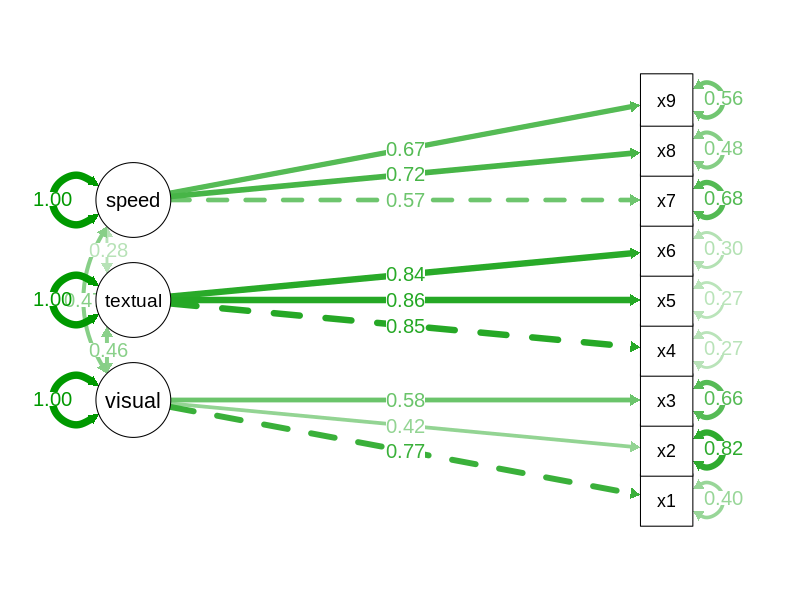

In [33]:
# Add the fitted model to the R environment so it can be accessed in R code
ro.globalenv['fit_r'] = fit_r

# Generate and save the SEM path diagram as a PNG
ro.r('''
library(semPlot)
png("sem_path_diagram.png", width=800, height=600)
semPaths(fit_r, what="std", layout="tree", rotation=2, sizeMan=7, sizeLat=10, edge.label.cex=1.2, nCharNodes=8, style="ram", title=FALSE)
dev.off()
''')

# Define the filename
filename = 'sem_path_diagram.png'

# Display the generated SEM path diagram
print(f"SEM path diagram saved as '{filename}'.")
display(Image(filename=filename))

In [34]:
# Predict latent variable (factor) scores from the fitted SEM model
factor_scores_r = ro.r('lavPredict')(fit_r)

# Convert the R factor scores to a NumPy array
with localconverter(ro.default_converter + pandas2ri.converter):
    factor_scores_np = ro.conversion.rpy2py(factor_scores_r)

# Convert to a Pandas DataFrame
factor_scores_pd = pd.DataFrame(factor_scores_np)

print("Predicted Latent Variable Scores (in Python):")
display(factor_scores_pd.head())

Predicted Latent Variable Scores (in Python):


,0,1,2
0,-0.817675,-0.137545,0.061507
1,0.049519,-1.012724,0.625494
2,-0.761397,-1.872286,-0.840573
3,0.419342,0.018486,-0.271337
4,-0.415905,-0.122250,0.194330


In [35]:
# Call the 'resid()' function from the R environment
residuals_r = ro.r('resid')(fit_r, type="cor")

# Extract the covariance matrix from the residuals
cov_matrix_r = residuals_r.rx2('cov')

# Convert the covariance matrix to a Pandas DataFrame
with localconverter(ro.default_converter + pandas2ri.converter):
    cov_matrix_pd = ro.conversion.rpy2py(cov_matrix_r)

print("Covariance Residuals:")
display(cov_matrix_pd)

Covariance Residuals:


array([[ 0.00000000e+00, -2.96238007e-02, -7.89666722e-03,
         7.13190954e-02, -9.17624384e-03,  6.01863954e-02,
        -1.39981768e-01, -3.86803673e-02,  1.48811459e-01],
       [-2.96238007e-02,  0.00000000e+00,  9.36807521e-02,
        -1.24683650e-02, -2.66875923e-02,  2.97693997e-02,
        -1.89183956e-01, -5.18371927e-02,  7.34916628e-02],
       [-7.89666722e-03,  9.36807521e-02,  0.00000000e+00,
        -6.82684125e-02, -1.50637875e-01, -2.56305967e-02,
        -8.37986613e-02, -1.16986858e-02,  1.46808608e-01],
       [ 7.13190954e-02, -1.24683650e-02, -6.82684125e-02,
         1.11022302e-16,  5.01163329e-03, -9.15423927e-03,
         3.65847545e-02, -6.73443180e-02,  4.75912149e-02],
       [-9.17624384e-03, -2.66875923e-02, -1.50637875e-01,
         5.01163329e-03,  0.00000000e+00,  3.40208233e-03,
        -3.57609802e-02, -3.62854162e-02,  6.65538267e-02],
       [ 6.01863954e-02,  2.97693997e-02, -2.56305967e-02,
        -9.15423927e-03,  3.40208233e-03,  1.110223

In [36]:
# Convert NumPy array to Pandas DataFrame
cov_matrix_df = pd.DataFrame(cov_matrix_pd,
                             columns=[f"x{i+1}" for i in range(cov_matrix_pd.shape[1])],
                             index=[f"x{i+1}" for i in range(cov_matrix_pd.shape[0])])

# Display the DataFrame
display(cov_matrix_df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
x1,0.000000,-0.029624,-0.007897,7.131910e-02,-0.009176,6.018640e-02,-0.139982,-0.038680,1.488115e-01
x2,-0.029624,0.000000,0.093681,-1.246837e-02,-0.026688,2.976940e-02,-0.189184,-0.051837,7.349166e-02
x3,-0.007897,0.093681,0.000000,-6.826841e-02,-0.150638,-2.563060e-02,-0.083799,-0.011699,1.468086e-01
x4,0.071319,-0.012468,-0.068268,1.110223e-16,0.005012,-9.154239e-03,0.036585,-0.067344,4.759121e-02
x5,-0.009176,-0.026688,-0.150638,5.011633e-03,0.000000,3.402082e-03,-0.035761,-0.036285,6.655383e-02
x6,0.060186,0.029769,-0.025631,-9.154239e-03,0.003402,1.110223e-16,-0.013955,-0.021854,5.645876e-02
x7,-0.139982,-0.189184,-0.083799,3.658475e-02,-0.035761,-1.395533e-02,0.000000,0.074974,-3.808680e-02
x8,-0.038680,-0.051837,-0.011699,-6.734432e-02,-0.036285,-2.185437e-02,0.074974,0.000000,-3.181577e-02
x9,0.148811,0.073492,0.146809,4.759121e-02,0.066554,5.645876e-02,-0.038087,-0.031816,2.220446e-16


In [37]:
# Add the SEM model to the R environment
ro.globalenv['sem_model_r'] = sem_model_r

# Fit the SEM model using bootstrapping
try:
    # Fit the SEM model with bootstrapping (1000 samples) in R
    fit_boot_r = ro.r('lavaan::sem')(sem_model_r, data=r_data, se="bootstrap", bootstrap=1000)

    # Call the summary function in R
    fit_boot_summary = ro.r('summary')(fit_boot_r, standardized=True)

    # Display the summary in Python
    print("Bootstrap SEM Model Summary:")
    print(fit_boot_summary)

except Exception as e:
    print(f"Bootstrap SEM fitting or summary extraction failed: {e}")

Bootstrap SEM Model Summary:
lavaan 0.6-18 ended normally after 35 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        21

  Number of observations                           301

Model Test User Model:
                                                      
  Test statistic                                85.306
  Degrees of freedom                                24
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                            Bootstrap
  Number of requested bootstrap draws             1000
  Number of successful bootstrap draws            1000

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  visual =~                                                             
    x1                1.000                               0.900    0.772
    x2                0.554   

In [38]:
# Dynamic filename generation
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
html_filename = f"sem_model_report_{timestamp}.html"

# Use capture.output() to export the summary directly
try:
    ro.r(f'''
    # Open a connection to the dynamic HTML file
    html_file <- file("{html_filename}", "w")

    # Write some basic HTML structure
    writeLines("<html><body><pre>", html_file)

    # Capture the output of the summary with better formatting
    summary_output <- capture.output(summary(fit_r, fit.measures=TRUE, standardized=TRUE))

    # Write the captured output to the file with line breaks
    writeLines(summary_output, html_file)

    # End the HTML structure
    writeLines("</pre></body></html>", html_file)

    # Close the file connection
    close(html_file)
    ''')

    print(f"SEM Model Summary saved to '{html_filename}'.")

except Exception as e:
    print(f"Error saving SEM model summary: {e}")

SEM Model Summary saved to 'sem_model_report_20240911_052601.html'.


In [39]:
# Display the HTML report
if os.path.exists(html_filename):
    with open(html_filename, "r") as f:
        html_content = f.read()
    display(HTML(html_content))
else:
    print(f"File '{html_filename}' does not exist.")